# Sentiment Analysis on Cryptocurrencies using Twitter tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from textblob import TextBlob
import configor
import re
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
APP_KEY = configor.APP_KEY
APP_SECRET = configor.APP_SECRET
TOKEN = configor.TOKEN
TOKEN_SECRET = configor.TOKEN_SECRET

In [3]:
auth = tweepy.OAuthHandler(APP_KEY, APP_SECRET)
auth.set_access_token(TOKEN,TOKEN_SECRET)
api= tweepy.API(auth)

In [4]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [5]:
key_words = ['Bitcoin','Ethereum','XRP','Bitcoin Cash','EOS','Stellar','Litecoin','Tether','Cardano','Monero']
key_words

['Bitcoin',
 'Ethereum',
 'XRP',
 'Bitcoin Cash',
 'EOS',
 'Stellar',
 'Litecoin',
 'Tether',
 'Cardano',
 'Monero']

In [6]:
datac = pd.DataFrame()
for i in range(len(key_words)):
    tweets = tweepy.Cursor(api.search, q=key_words[i]).items(100)
    tweets_data = pd.DataFrame(data=[clean_tweet(tweet.text) for tweet in tweets], columns=[key_words[i]])
    datac = pd.concat([datac,tweets_data], axis=1)

In [7]:
datac.shape

(100, 10)

In [8]:
datac.head()

,Bitcoin,Ethereum,XRP,Bitcoin Cash,EOS,Stellar,Litecoin,Tether,Cardano,Monero
0,Moving on to sealed case 19 17 Now case no 1 1...,RT Tron TRX Continues Market Explosion Floods ...,RT Boom,RT C4fe Today I found the WORST Bitcoin ATM in...,235 DApps and 3 5 Billion in Transactions Prom...,RT My department is making sure student evalua...,LitecoinFam PayWithLitecoin TheLitecoinApp Ign...,RT My next Samus video I ll be showcasing this...,j meinti s s tekur lengri t ma v verri v lb na...,RT The Monero Coffee Chat starts now
1,LocalBitcoins Hacked bitcoin altcoin ico,RT This is why you should always be civil with...,RT Giving away 300 worth of Bitcoin Retweet an...,RT C4fe Today I found the WORST Bitcoin ATM in...,Prices update in USDT 1 hour EOS 2 42 0 12 ADA...,I hope everyone is having a stellar Saturday T...,LitecoinFam PayWithLitecoin TheLitecoinApp Ign...,RT Quand les astronautes d Apollo 17 installai...,crypto gets 4words or less Cardano ADA Layered...,What an endorsement for Monero
2,RT Imagine you have a vault full of gold that ...,BeLLCoin BeLLPlatform BeLLDEX blockchain ether...,Stupid XRP shillers fuck that cult,RT Me We are glad to announce that Exrates exc...,RT charlie 400 000 VEY Giveaway worth 240 Foll...,I ve seen other journos do a stellar job of th...,RT Since noticing it s mining profitability wa...,RT I surrender to the wind like a kite without...,My lambo with bitcoin Register Now amp Start B...,Libre y doble Monero
3,RT Giving away 300 worth of Bitcoin Retweet an...,Buy GHT token here GHT explainer Telegram group,RT Is the easiest way for people in the states...,RT BITCOIN X BTX amp CITRON CASH XCT Holders a...,Tron battle with Eos over No 5 spot on CMC COM...,RT A STELLAR concert performance film by the h...,RT Website github slack coincodex,ePortfolio pedagogies curriculum lend themselv...,RT Bitcoiners be like Register Now amp Start B...,RT The Monero Coffee Chat starts now
4,Bitcoin BTC Could Be Gearing up For a Big Move...,RT HOT is on a mission to get into the top 20 ...,Make money trading on Binance The best Crypto ...,RT C4fe Today I found the WORST Bitcoin ATM in...,RT 235 DApps and 3 5 Billion in Transactions P...,RT This is why you should always be civil with...,RT LTK ETH trading pair is available on EtherF...,USA Politik in Venezuela mit Abby Martin Greg ...,The Current Price of Cardano is 0 042690 0 12 ...,NuevaFotoDePerfil Chivas LIGABancomerMX Lider ...


In [9]:
datac_SA = dict()
for key,value in datac.iteritems():
    datac_SA[key] = np.array([analize_sentiment(tweet) for tweet in datac[key]] )

In [10]:
datac_SA

{'Bitcoin': array([ 0,  0,  1, -1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  1, -1,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  1,  0, -1,  0,  1,  0, -1,  0,  0,
         1,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0, -1, -1,  1, -1,  1, -1,
         1,  1,  0,  1,  0,  0, -1,  0,  1, -1,  1,  1,  0, -1,  0, -1,  0,
         0,  0,  1,  0,  1,  0,  0,  1, -1,  0, -1,  1,  1,  0,  1,  0, -1,
         1, -1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1]),
 'Bitcoin Cash': array([-1, -1,  1,  0, -1,  0, -1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,
         0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0, -1,  0,  0,  0,
         0,  1,  0,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  0,  0,  0,  0,
         1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,
         0,  1,  1,  0,  0,  1,  0,  1,  0,  0, -1,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0]),
 'Cardano': array([ 0, -1,  0,  0, -1,  0,  0,  0,  1, -1,  0,  1,  0,  1

In [11]:
SA = {key: sum(datac_SA[key]) for key in datac_SA}
print(SA)

{'Bitcoin': 18, 'Ethereum': 27, 'XRP': 29, 'Bitcoin Cash': 24, 'EOS': 50, 'Stellar': 66, 'Litecoin': 46, 'Tether': 32, 'Cardano': 14, 'Monero': 32}


In [12]:
SA = sorted(SA.items(), key=lambda d: (-d[1], d[0]))

In [13]:
SA

[('Stellar', 66),
 ('EOS', 50),
 ('Litecoin', 46),
 ('Monero', 32),
 ('Tether', 32),
 ('XRP', 29),
 ('Ethereum', 27),
 ('Bitcoin Cash', 24),
 ('Bitcoin', 18),
 ('Cardano', 14)]

In [14]:
SA1 = pd.DataFrame(SA, columns=['cryptocurrency names', 'sentiment score'])
SA1

,cryptocurrency names,sentiment score
0,Stellar,66
1,EOS,50
2,Litecoin,46
3,Monero,32
4,Tether,32
5,XRP,29
6,Ethereum,27
7,Bitcoin Cash,24
8,Bitcoin,18
9,Cardano,14


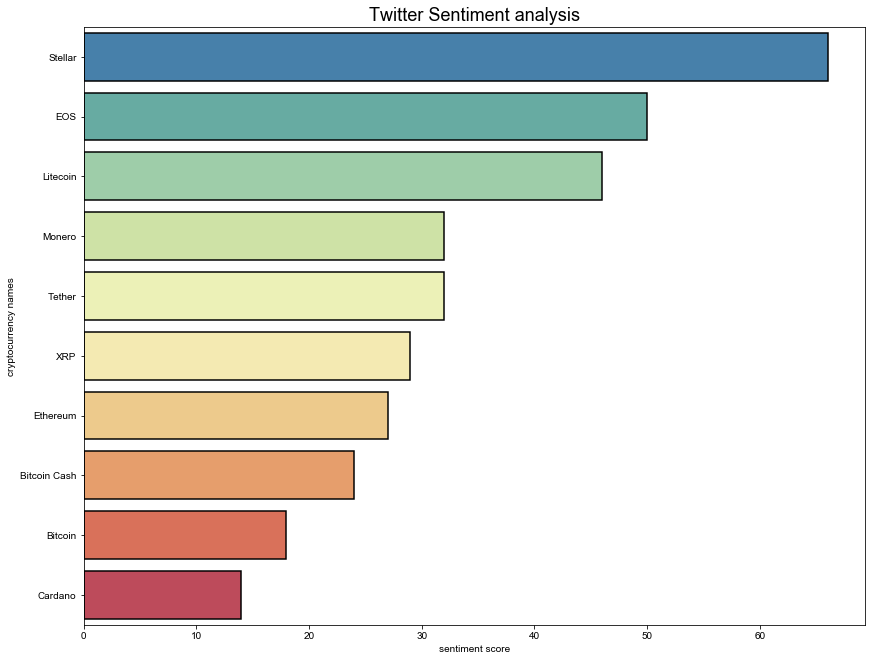

In [15]:
plt.figure(figsize=(14,11))
ax = sns.barplot(y=SA1['cryptocurrency names'],x=SA1['sentiment score'],
            linewidth = 1.5, edgecolor = "k"*10, palette  = "Spectral_r")
sns.set(font_scale=1.5),plt.title("Twitter Sentiment analysis");